In [1]:
from utils.cif_parser import parse_cif_information

folder_path = "pr2_cifs" 
df = parse_cif_information(folder_path)

df

,Filename,Formula,Entry prototype,Notes,Num Elements,2c,2a,6h1,6h2,12k
0,,,,,,0.333 0.667 0.250,0.000 0.000 0.000,0.541 0.083(1) 0.250,0.886 0.773 0.250,0.210 0.419(1) 0.060
1,1532717.cif,Al3Ho10Pd,"Cd3Y10Ru,hP28,194",,3,Pd,Ho,Ho,Al,Ho
2,1722741.cif,Cd3NiY10,"Cd3Y10Ru,hP28,194",,3,Ni,Y,Y,Cd,Y
3,1722755.cif,Cd3CoEr10,"Cd3Y10Ru,hP28,194",,3,Co,Er,Er,Cd,Er
4,1722754.cif,Cd3CoHo10,"Cd3Y10Ru,hP28,194",,3,Co,Ho,Ho,Cd,Ho
...,...,...,...,...,...,...,...,...,...,...
77,1532719.cif,Al3OsY10,"Cd3Y10Ru,hP28,194",,3,Os,Y,Y,Al,Y
78,1722765.cif,Cd3RuTm10,"Cd3Y10Ru,hP28,194",,3,Ru,Tm,Tm,Cd,Tm
79,1722759.cif,Cd3NiTm10,"Cd3Y10Ru,hP28,194",,3,Ni,Tm,Tm,Cd,Tm
80,1722758.cif,Cd3Dy10Ni,"Cd3Y10Ru,hP28,194",,3,Ni,Dy,Dy,Cd,Dy


### 📄 Load and Preprocess Crystal Site Data

This step loads the CSV file with site information and processes it by combining specific site occupancy columns into standardized columns:  
- **R** combines `'2a'`, `'6h (1)'`, and `'12k'`  
- **X** maps from `'6h (2)'`  
- **M** maps from `'2c'`  
The `process_csv` function parses element counts and merges them into a unified chemical formula per group.

In [2]:
from utils.preprocess import process_csv

rename_map = {
    "R": ["2a", "6h1", "12k"],
    "M": ["2c"],
    "X": ["6h2"]
}

df = process_csv(df, rename_map)
print(df.head(10))

       Filename    Formula    Entry prototype Notes      R   M   X
0                                                                 
2   1722741.cif   Cd3NiY10  Cd3Y10Ru,hP28,194         Y3.0  Ni  Cd
3   1722755.cif  Cd3CoEr10  Cd3Y10Ru,hP28,194        Er3.0  Co  Cd
4   1722754.cif  Cd3CoHo10  Cd3Y10Ru,hP28,194        Ho3.0  Co  Cd
5   1722740.cif   Cd3RuY10  Cd3Y10Ru,hP28,194         Y3.0  Ru  Cd
6   1532716.cif   Al3PdY10  Cd3Y10Ru,hP28,194         Y3.0  Pd  Al
7   1532714.cif   Al3RhY10  Cd3Y10Ru,hP28,194         Y3.0  Rh  Al
8   1147154.cif  Al3CoTm10  Cd3Y10Ru,hP28,194        Tm3.0  Co  Al
9   1722756.cif  Cd3CoTm10  Cd3Y10Ru,hP28,194        Tm3.0  Co  Cd
10  1722742.cif   Cd3PdY10  Cd3Y10Ru,hP28,194         Y3.0  Pd  Cd


Generate the features for each site

For sites with mixing, weighted features are generated

In [3]:
from utils.feature import process_features

element_features_excel = "data/elemental-property-list.xlsx"

df_site_features = process_features(df, element_features_excel)

df_site_features

,Filename,Formula,Site,Site_Label,Atomic weight,Atomic number,Period,Group,quantum number l,Metal(1)/ metalloid(2)/ nonmetal(3),...,DFT RLDA Ekin,DFT RLDA Ecoul,DFT RLDA Eenuc,DFT RLDA Exc,DFT ScRLDA Etot,DFT ScRLDA Ekin,DFT ScRLDA Ecoul,DFT ScRLDA Eenuc,DFT ScRLDA Exc,Neutron Cross Section
0,1722741.cif,Cd3NiY10,Y3.0,R,88.90584,39.0,5.0,3.0,2.0,1.0,...,3476.837608,1398.703210,-8151.743067,-101.827955,-3377.673981,3460.017556,1397.559798,-8133.552916,-101.698418,1.28
1,1722741.cif,Cd3NiY10,Ni,M,58.69340,28.0,4.0,10.0,2.0,1.0,...,1538.210790,650.193085,-3645.802520,-59.448222,-1516.805505,1534.719054,649.913565,-3642.030376,-59.407749,4.50
2,1722741.cif,Cd3NiY10,Cd,X,112.41100,48.0,5.0,12.0,0.0,1.0,...,5839.236393,2265.151850,-13545.979295,-142.057637,-5582.286913,5793.217213,2262.334423,-13496.044867,-141.793682,2450.00
3,1722755.cif,Cd3CoEr10,Er3.0,R,167.25900,68.0,6.0,3.0,3.0,1.0,...,14376.130835,5127.726897,-32324.747955,-247.278978,-13055.061842,14108.042664,5114.219595,-32030.841083,-246.483018,165.00
4,1722755.cif,Cd3CoEr10,Co,M,58.93320,27.0,4.0,9.0,2.0,1.0,...,1407.710690,592.105098,-3333.731437,-55.780174,-1389.663179,1404.758937,591.861977,-3330.539729,-55.744364,37.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1722758.cif,Cd3Dy10Ni,Ni,M,58.69340,28.0,4.0,10.0,2.0,1.0,...,1538.210790,650.193085,-3645.802520,-59.448222,-1516.805505,1534.719054,649.913565,-3642.030376,-59.407749,4.50
236,1722758.cif,Cd3Dy10Ni,Cd,X,112.41100,48.0,5.0,12.0,0.0,1.0,...,5839.236393,2265.151850,-13545.979295,-142.057637,-5582.286913,5793.217213,2262.334423,-13496.044867,-141.793682,2450.00
237,1722764.cif,Cd3Er10Ru,Er3.0,R,167.25900,68.0,6.0,3.0,3.0,1.0,...,14376.130835,5127.726897,-32324.747955,-247.278978,-13055.061842,14108.042664,5114.219595,-32030.841083,-246.483018,165.00
238,1722764.cif,Cd3Er10Ru,Ru,M,101.07000,44.0,5.0,8.0,2.0,1.0,...,4693.065137,1846.844764,-10938.009162,-123.446179,-4520.768581,4662.961423,1844.917123,-10905.397430,-123.249697,2.60


Running PLS-DA with 2 components

Preprocesing:
 * External scaling - `StandardScaler` and `MinMaxScaler`
 * Without internal scaling

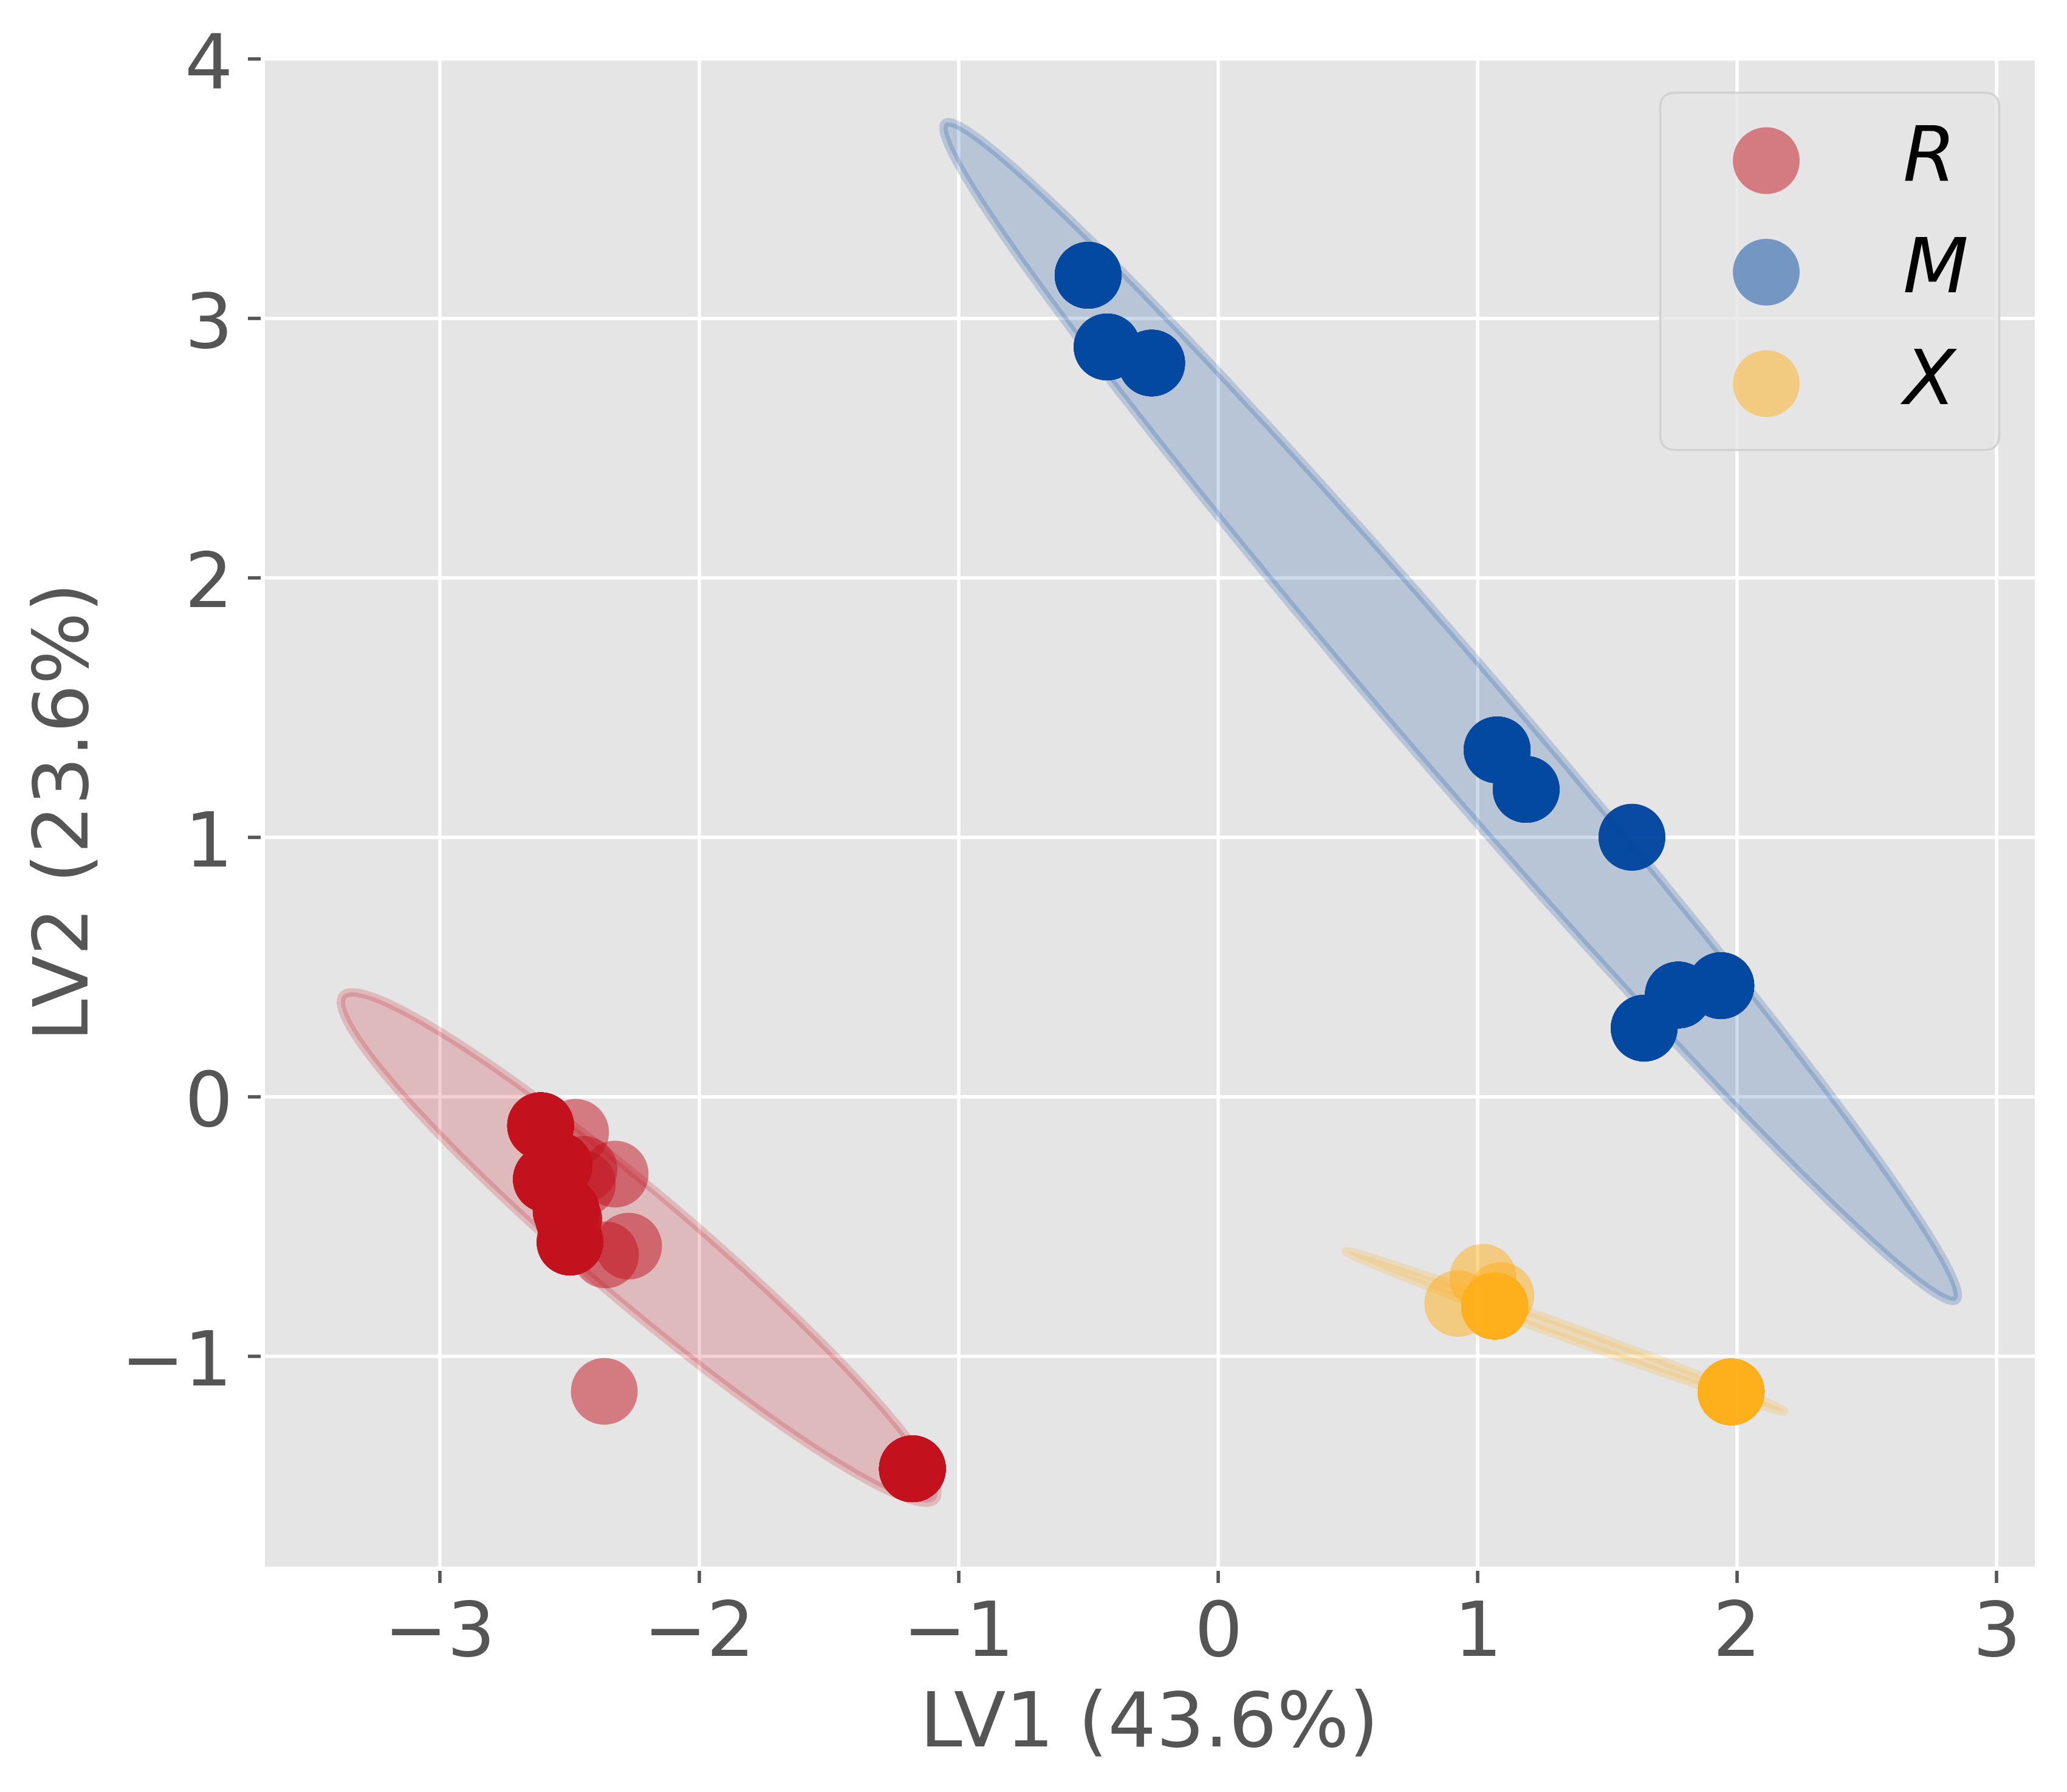

Full loadings saved to outputs/PLS_DA_loadings.xlsx.


In [4]:
from core.plsda import run_pls_da

pls_loadings = run_pls_da(df_site_features)

Common features between property file and PLS‑DA: ['Atomic weight', 'Atomic number', 'Period', 'Group', 'quantum  number l', 'Metal(1)/ metalloid(2)/ nonmetal(3)', 'Mendeleev number', 'Families', 'valence s', 'valence p', 'valence d', 'valence f', 'unfilled s', 'unfilled p', 'unfilled d', 'unfilled f', 'no. of  valence  electrons', 'outer shell electrons', 'Gilman no. of valence electrons', 'Metallic  valence', 'Zeff', '1st Bohr radius (a0)', 'Ionization energy (eV)', 'Electron affinity (ev)', 'Pauling EN', 'Martynov Batsanov EN', 'Mulliken EN', 'Allred EN', 'Allred Rockow EN', 'Nagle EN', 'Ghosh EN', 'Atomic radius calculated', 'Covalent radius', 'Ionic radius', 'Effective ionic radius', 'Miracle radius', 'van der Waals radius', 'Zunger radii sum', 'Crystal radius', 'Covalent CSD radius', 'Slater radius', 'Orbital radius', 'polarizability, A^3', 'Melting point, K', 'Boiling point, K', 'Density,  g/mL', 'Specific heat, J/g K', 'Heat of fusion,  kJ/mol', 'Heat of vaporization,  kJ/mol',

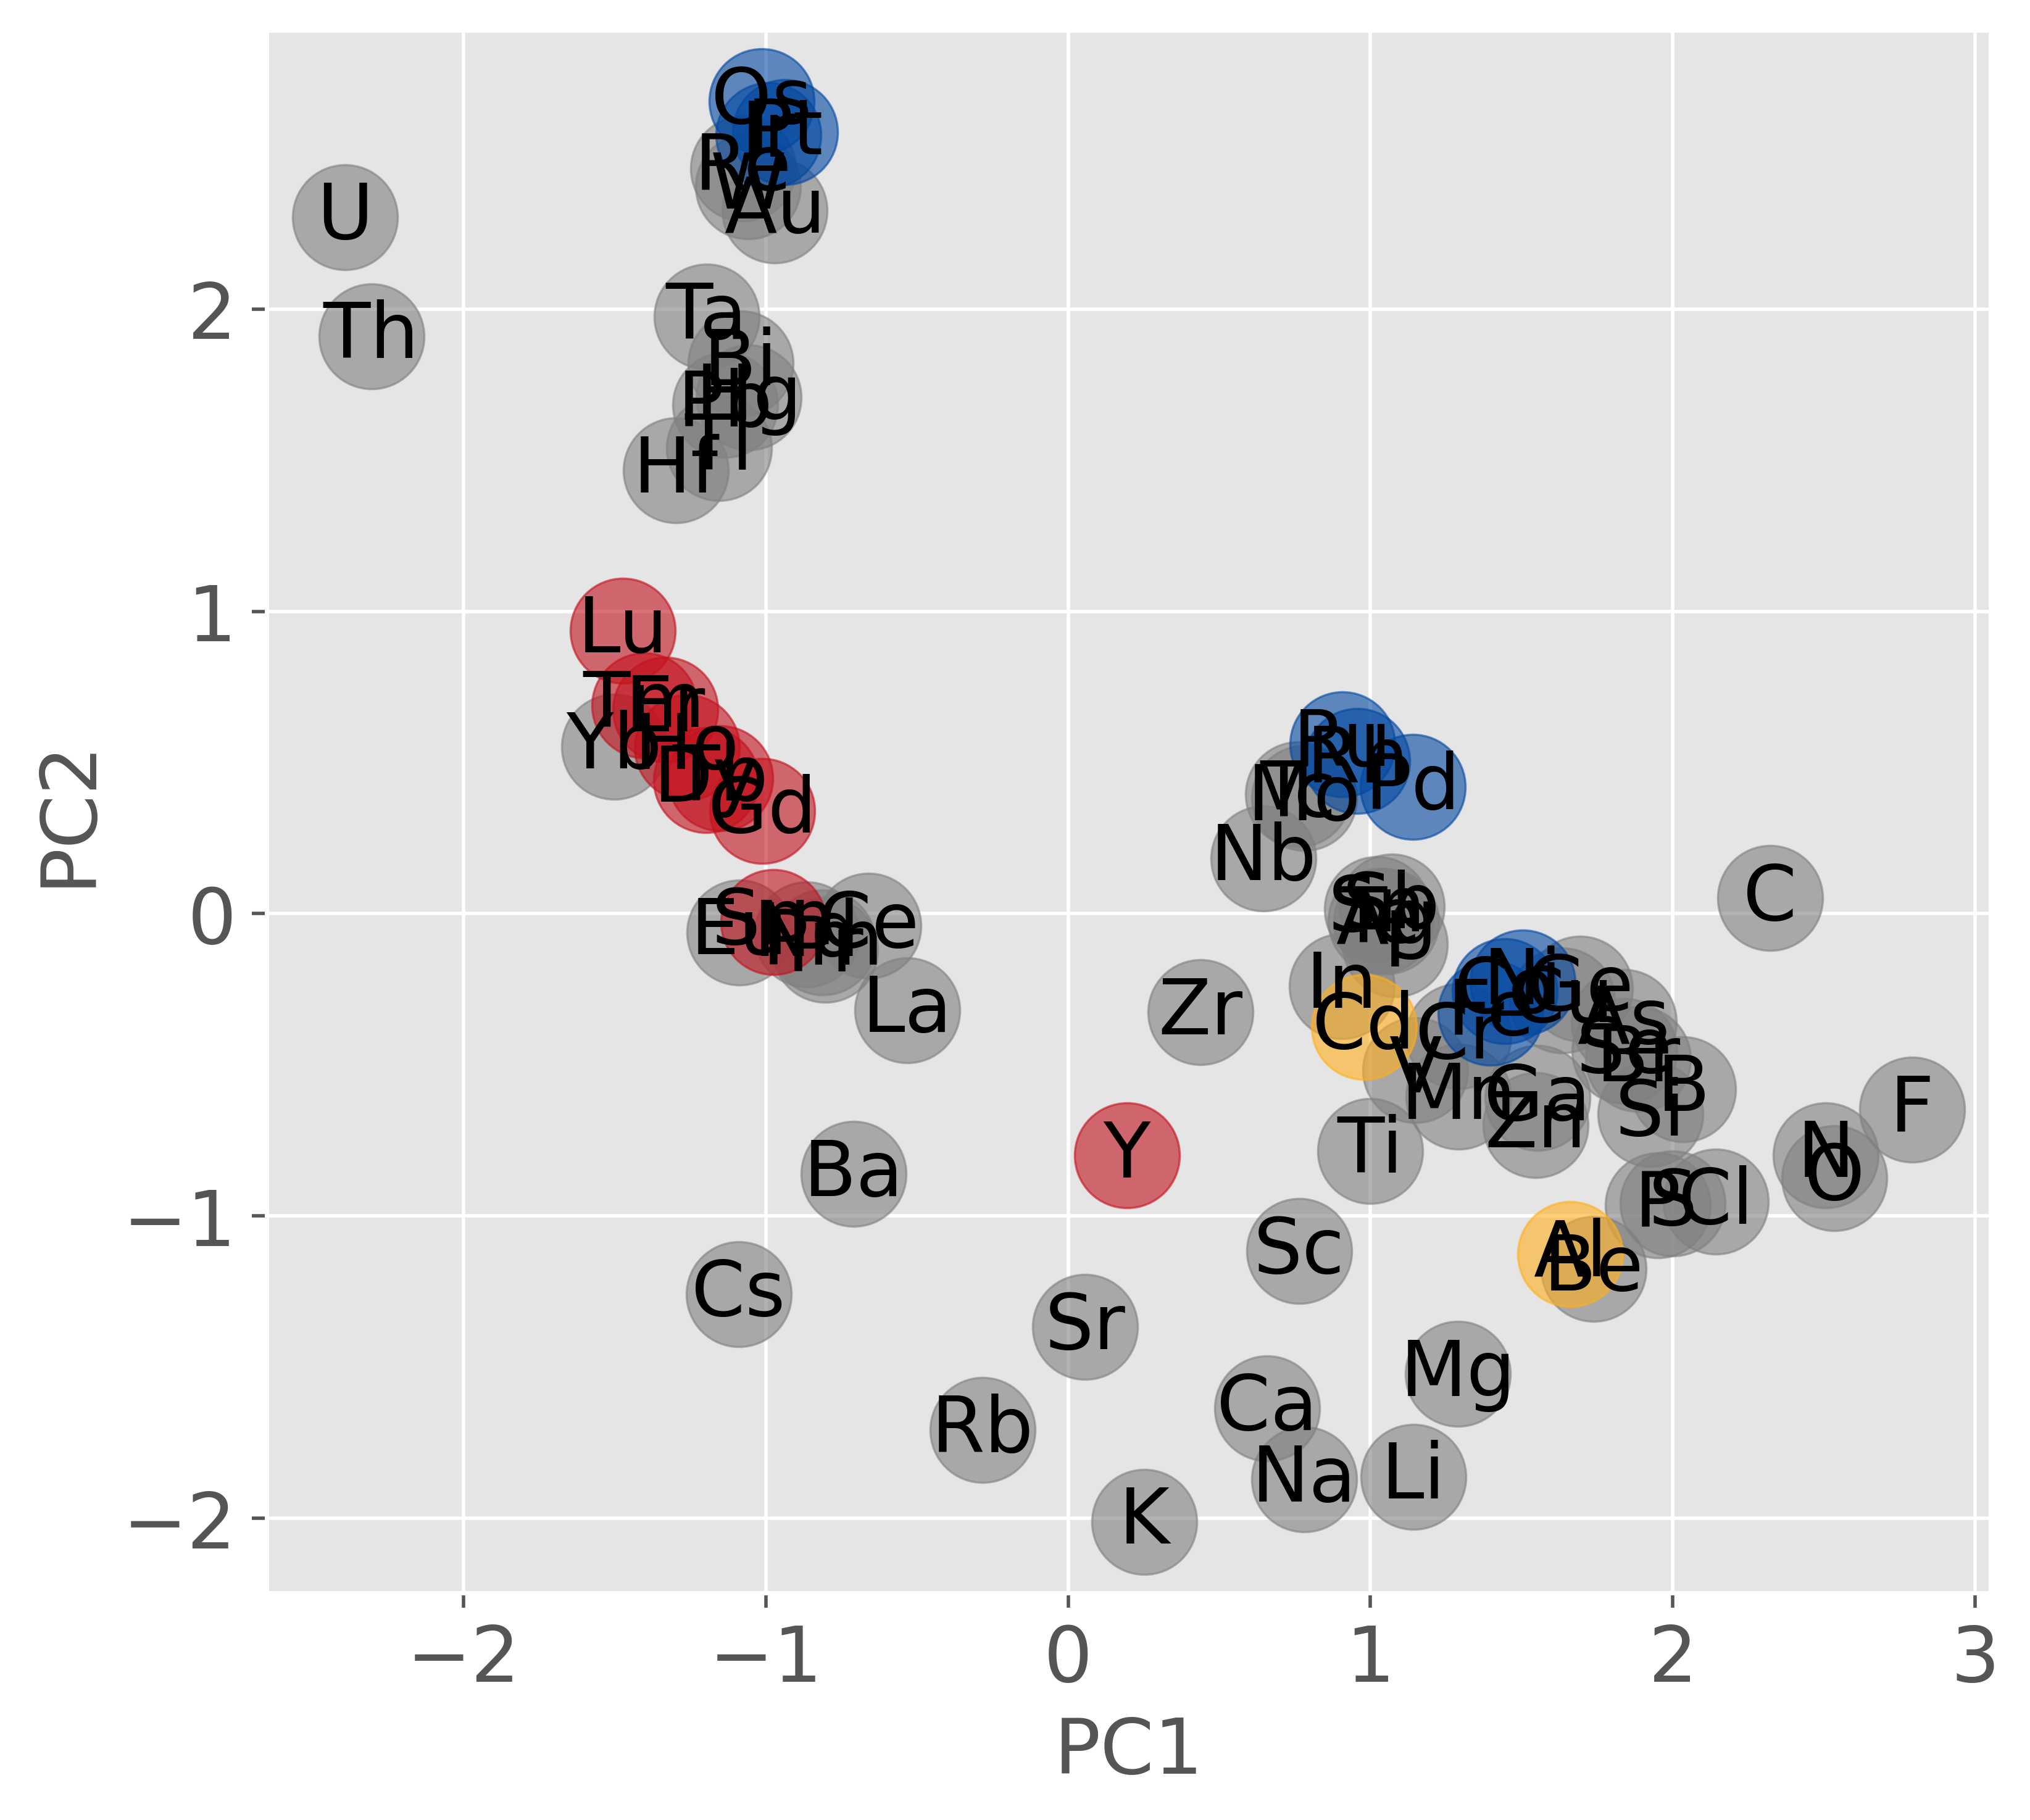

Coordinates saved to outputs/coordinates.xlsx


In [5]:
from core.projection import plot_elements_from_plsda_loadings

coords = plot_elements_from_plsda_loadings(pls_loadings, df)

/Users/danila/Documents/GitHub/STEx-ternary/core/visualization.py:207: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


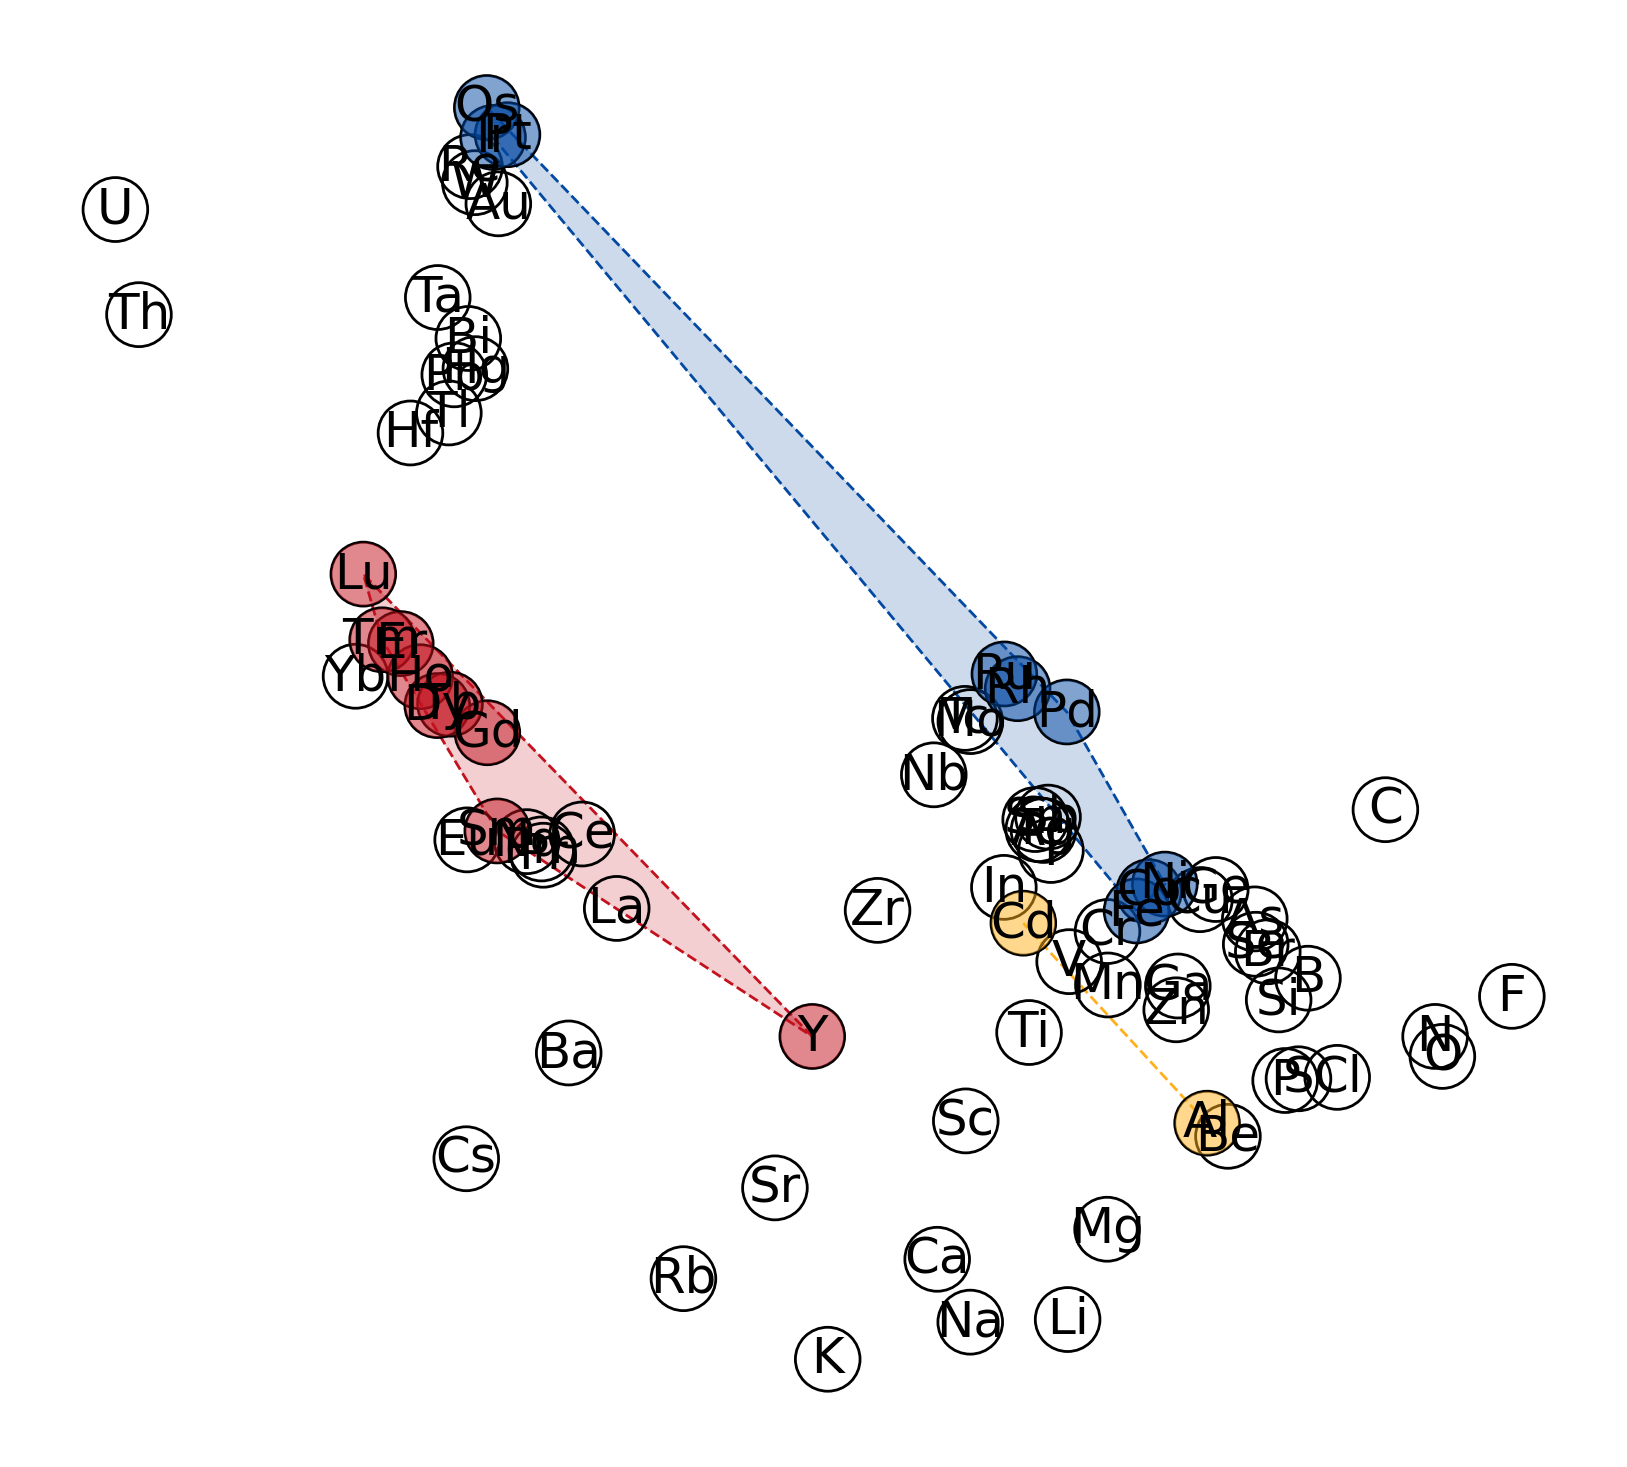

In [6]:
from core.visualization import visualize_elements

visualize_elements(coords, df, compounds_markers=False)

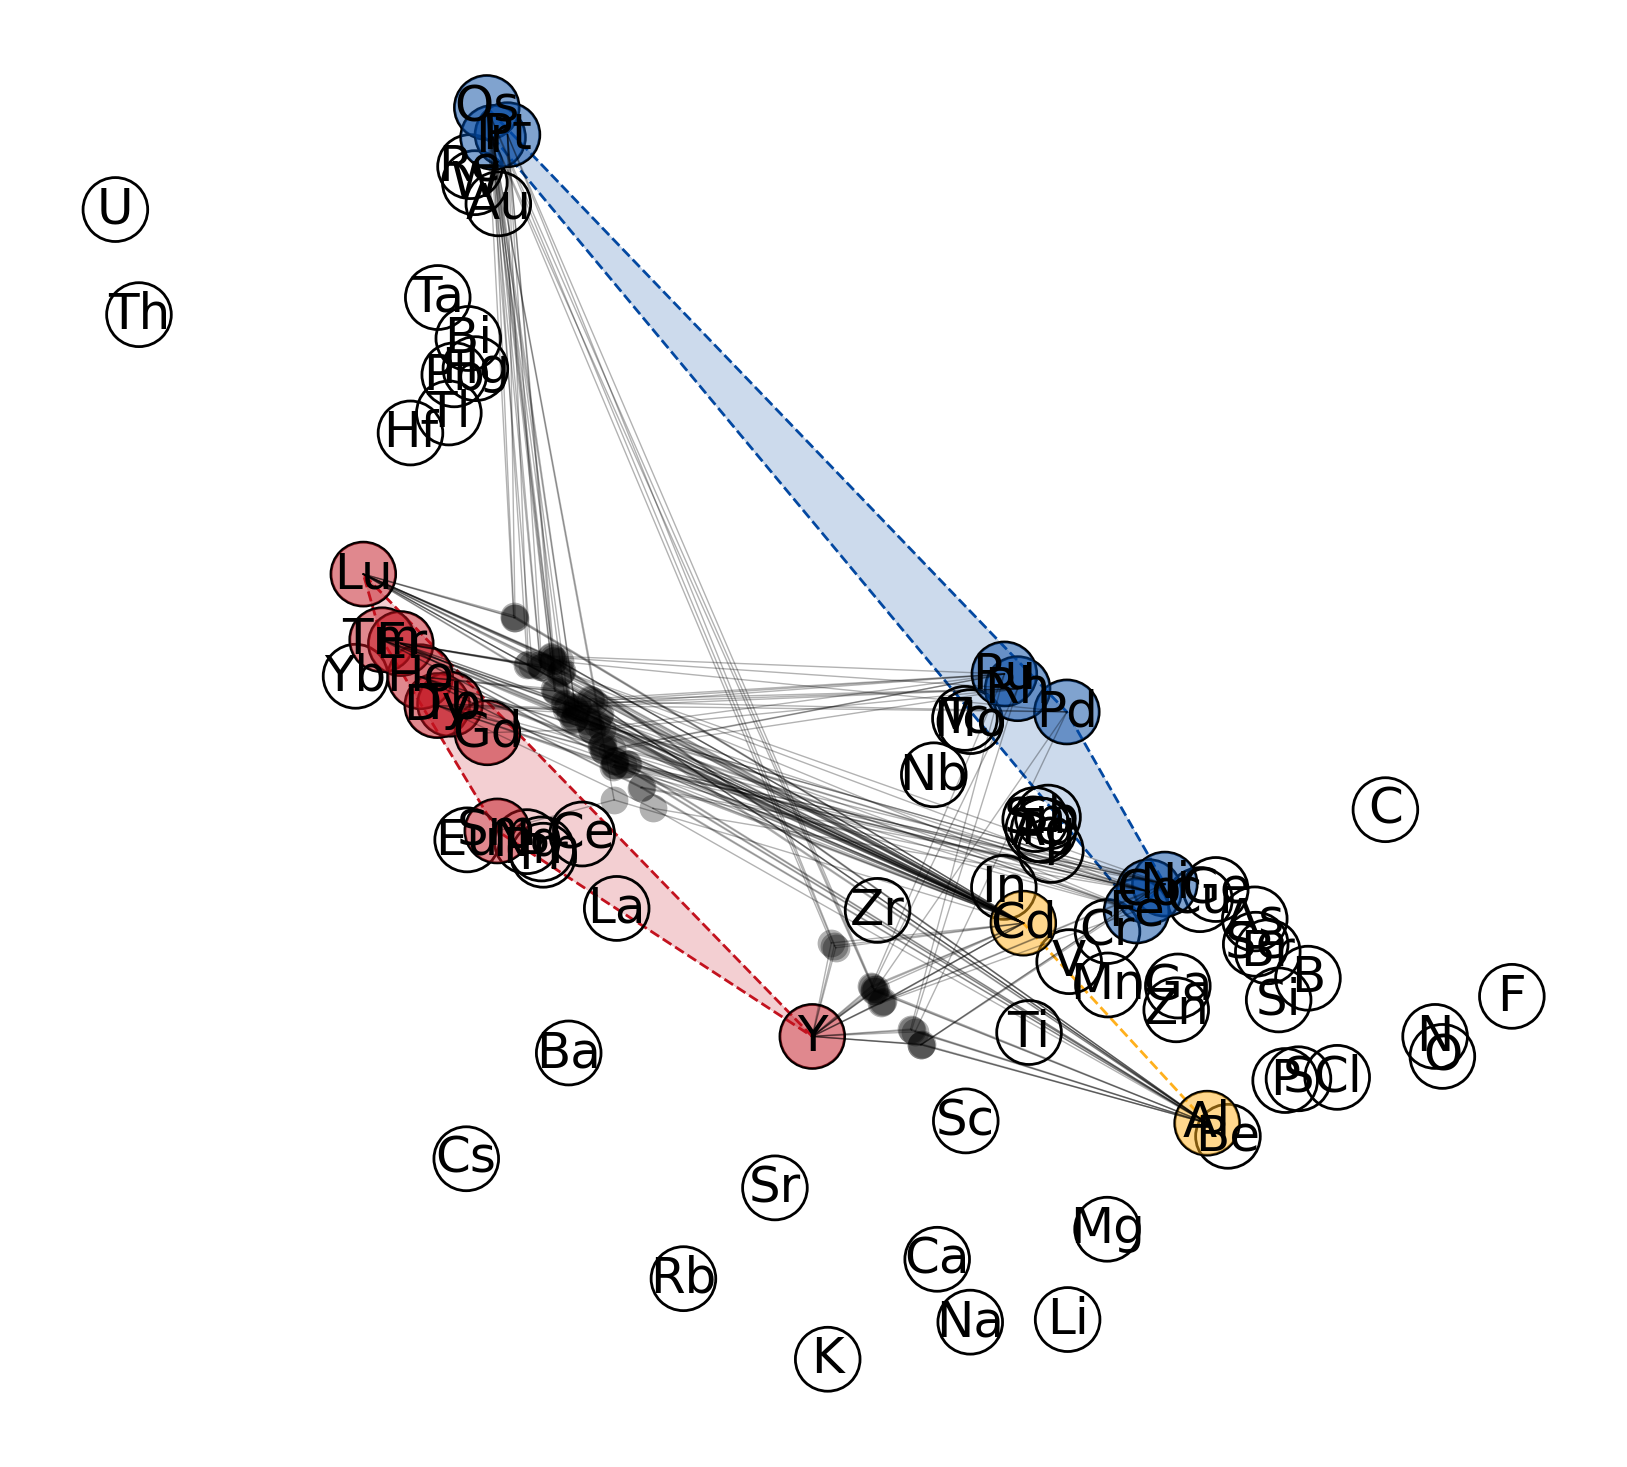

In [7]:
visualize_elements(coords, df, compounds_markers=True)

In [17]:
from core.recommendation import recommendation_engine, best_recommendation, add_candidate
fixed = {"R": "Tb", 
         "M": "Ru"
         } 

recommendations_df = recommendation_engine(fixed, df, coordinate_file="outputs/coordinates.xlsx")
                                            
print(recommendations_df)

Recommendations saved to 'outputs/recommendations.xlsx'.
  Element_rec1  Value_rec1 Element_rec2  Value_rec2 Element_rec3  Value_rec3
0           Be       1.000                      NaN                      NaN
1           In       0.601                      NaN                      NaN
2            V       0.411                      NaN                      NaN
3            I       0.315                      NaN                      NaN
4           Cr       0.292                      NaN                      NaN
5            P       0.277                      NaN                      NaN
6           Te       0.258                      NaN                      NaN
7           Ag       0.258                      NaN                      NaN
8            S       0.243                      NaN                      NaN
9           Mn       0.235                      NaN                      NaN


In [18]:
candidates = best_recommendation(recommendations_df)
candidates

No common element found in all recommendations


[]

In [19]:
updated_df = add_candidate(df, fixed, candidates, filename="new_candidate.cif")
print(updated_df)

New candidate rows added to the DataFrame.
       Filename    Formula    Entry prototype Notes      R   M   X
0                                                                 
1   1722741.cif   Cd3NiY10  Cd3Y10Ru,hP28,194         Y3.0  Ni  Cd
2   1722755.cif  Cd3CoEr10  Cd3Y10Ru,hP28,194        Er3.0  Co  Cd
3   1722754.cif  Cd3CoHo10  Cd3Y10Ru,hP28,194        Ho3.0  Co  Cd
4   1722740.cif   Cd3RuY10  Cd3Y10Ru,hP28,194         Y3.0  Ru  Cd
..          ...        ...                ...   ...    ...  ..  ..
76  1532719.cif   Al3OsY10  Cd3Y10Ru,hP28,194         Y3.0  Os  Al
77  1722765.cif  Cd3RuTm10  Cd3Y10Ru,hP28,194        Tm3.0  Ru  Cd
78  1722759.cif  Cd3NiTm10  Cd3Y10Ru,hP28,194        Tm3.0  Ni  Cd
79  1722758.cif  Cd3Dy10Ni  Cd3Y10Ru,hP28,194        Dy3.0  Ni  Cd
80  1722764.cif  Cd3Er10Ru  Cd3Y10Ru,hP28,194        Er3.0  Ru  Cd

[81 rows x 7 columns]


/Users/danila/Documents/GitHub/STEx-ternary/core/visualization.py:207: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


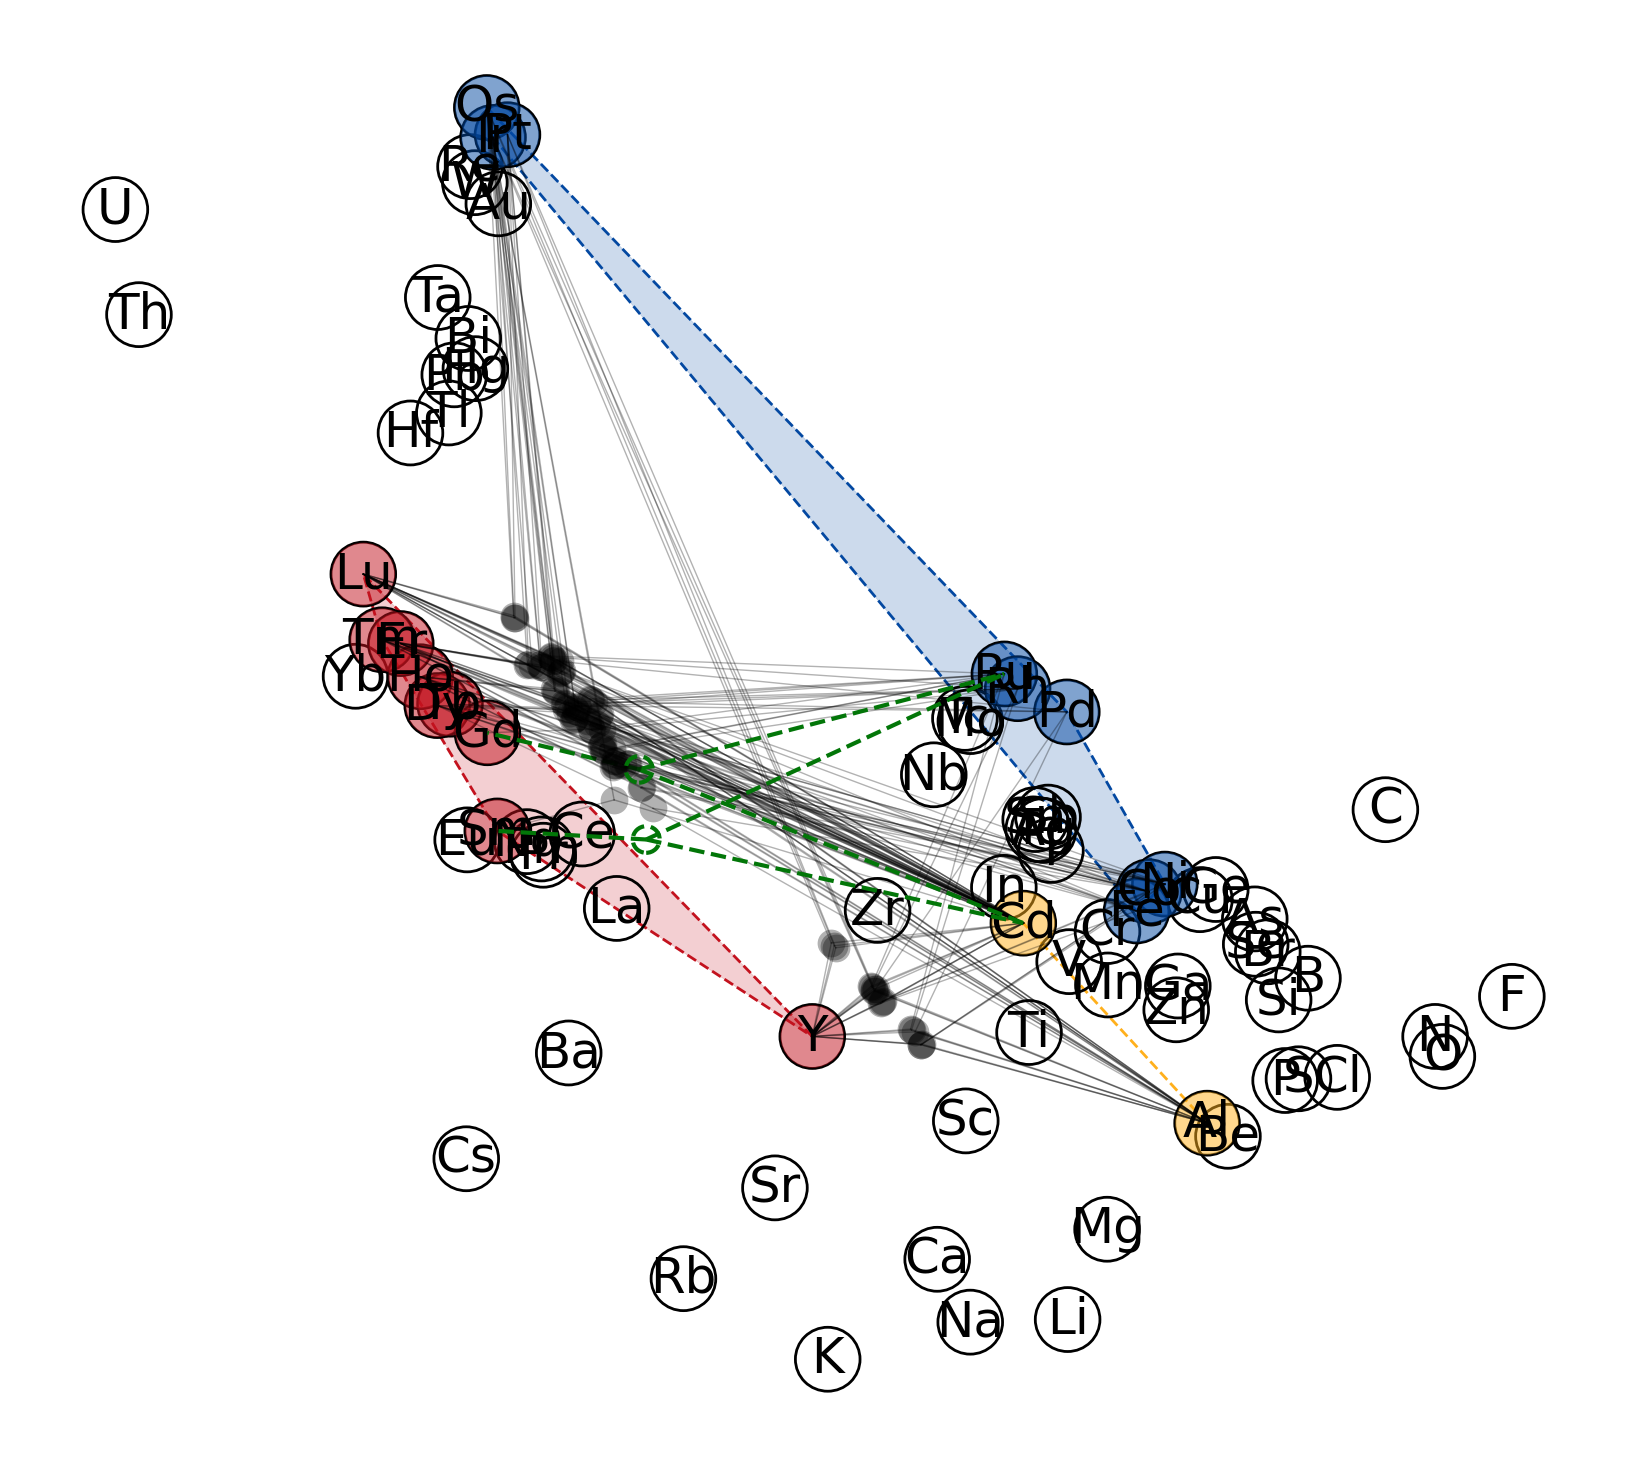

In [16]:
visualize_elements(coords, updated_df, compounds_markers=True)